# **BASELINE NN:**








Step 1: load the data

In [33]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Step 2: normalizing pixel values between 0 and 1

In [34]:
# Normalize pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

Step 3: Split the data into training, validation, and test sets

In [35]:
# Split the data into training, validation, and test sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15, random_state=42)


Model 1 - Baseline NN: Simple Neural Network Architecture

In [36]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flattens the input image from 28x28 to 784
    Dense(128, activation='relu'),  # Fully connected layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax') # Output layer with 10 neurons for each class and softmax activation
])

Compile the model:

In [37]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Trai the model:

In [38]:
import time

# Train the model
start_time = time.time()
history = model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))
end_time = time.time()
training_time = end_time - start_time
print(f'Training time: {training_time} seconds')

Epoch 1/10
1594/1594 [==============================] - 6s 3ms/step - loss: 0.5109 - accuracy: 0.8202 - val_loss: 0.4141 - val_accuracy: 0.8473
Epoch 2/10
1594/1594 [==============================] - 6s 4ms/step - loss: 0.3863 - accuracy: 0.8612 - val_loss: 0.4256 - val_accuracy: 0.8417
Epoch 3/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3435 - accuracy: 0.8752 - val_loss: 0.4154 - val_accuracy: 0.8482
Epoch 4/10
1594/1594 [==============================] - 6s 4ms/step - loss: 0.3189 - accuracy: 0.8844 - val_loss: 0.3494 - val_accuracy: 0.8734
Epoch 5/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2985 - accuracy: 0.8898 - val_loss: 0.3498 - val_accuracy: 0.8722
Epoch 6/10
1594/1594 [==============================] - 6s 4ms/step - loss: 0.2844 - accuracy: 0.8949 - val_loss: 0.3390 - val_accuracy: 0.8768
Epoch 7/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.2711 - accuracy: 0.8994 - val_loss: 0.3674 - val_accuracy:

evaluate the model:

282/282 [==============================] - 1s 2ms/step


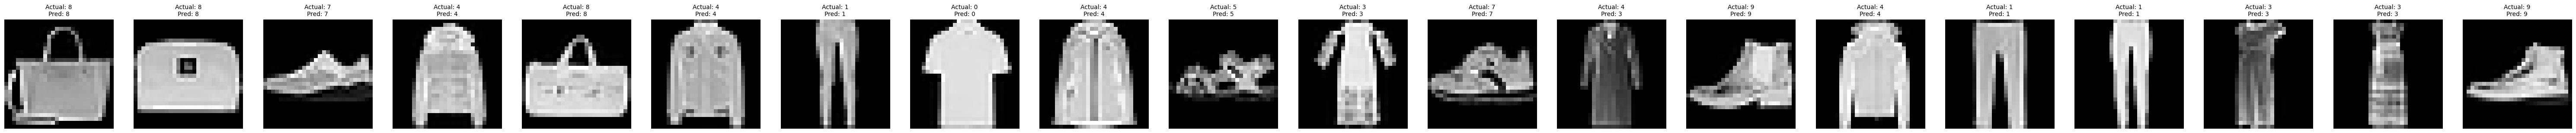

In [39]:
import matplotlib.pyplot as plt

# Function to display images along with their actual and predicted labels
def plot_images(images, labels_true, labels_pred, num_images=10):
    num_rows = 1
    num_cols = num_images
    plt.figure(figsize=(3*num_cols, 3*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Actual: {labels_true[i]}\nPred: {labels_pred[i]}', fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Predict labels for the validation set
predicted_labels = np.argmax(model.predict(val_images), axis=-1)

# Display some samples along with their actual and predicted labels
plot_images(val_images, val_labels, predicted_labels, num_images=20)


Evaluating the test set:

In [40]:

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy of model: {test_accuracy}')


313/313 [==============================] - 1s 2ms/step - loss: 0.3568 - accuracy: 0.8787
Test accuracy of model: 0.8787000179290771


evaluating the validation set:

In [41]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_images, val_labels)

print(f'Validation accuracy: {val_accuracy}')


282/282 [==============================] - 1s 2ms/step - loss: 0.3310 - accuracy: 0.8810
Validation accuracy: 0.8809999823570251


# **PCA-NN:**

Applying PCA to the training data:

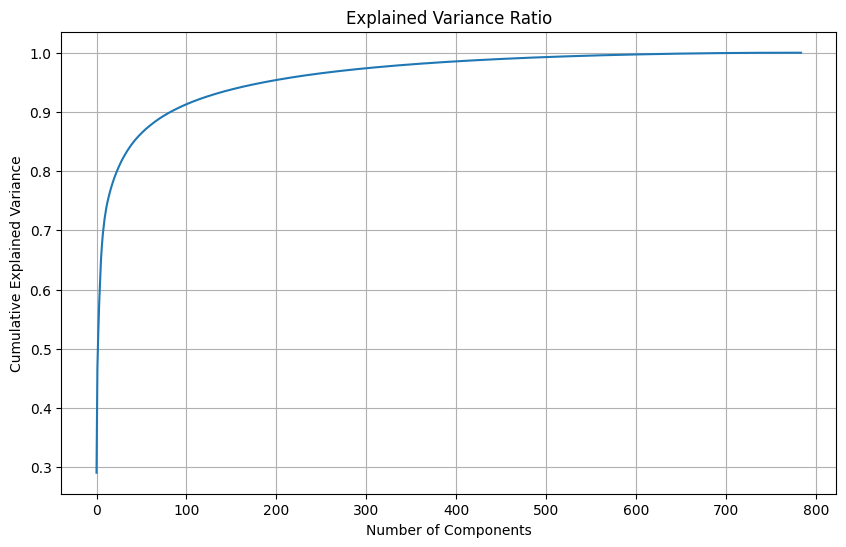

In [42]:
from sklearn.decomposition import PCA

# Reshape training data to 2D array (samples, features)
train_images_flat = train_images.reshape(train_images.shape[0], -1)

# Apply PCA
pca = PCA()
pca.fit(train_images_flat)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.grid(True)
plt.show()


Choosing suitable number of PC's:

In [43]:
# Choose the number of components based on explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f'Number of components to explain at least 95% variance: {n_components}')

# Apply PCA with chosen number of components
pca = PCA(n_components=n_components)
train_images_pca = pca.fit_transform(train_images_flat)


Number of components to explain at least 95% variance: 187


Using principal components as input for the neural network:

In [44]:
# Define a new neural network model
pca_model = Sequential([
    Dense(128, activation='relu', input_shape=(n_components,)),
    Dense(10, activation='softmax')
])

# Compile the model
pca_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Display the model summary
pca_model.summary()

# Apply PCA to the validation set
val_images_flat = val_images.reshape(val_images.shape[0], -1)
val_images_pca = pca.transform(val_images_flat)



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               24064     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 25354 (99.04 KB)
Trainable params: 25354 (99.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Train the model:

In [45]:
import time

# Train the model
start_time = time.time()
# Train the model on the transformed data
history_pca = pca_model.fit(train_images_pca, train_labels, epochs=10, validation_data=(val_images_pca, val_labels)) #epochs can be lowered to as little as 2 with minimal change in accuracy
end_time = time.time()
training_time = end_time - start_time
print(f'Training time: {training_time} seconds')

Epoch 1/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.4827 - accuracy: 0.8356 - val_loss: 0.3704 - val_accuracy: 0.8661
Epoch 2/10
1594/1594 [==============================] - 5s 3ms/step - loss: 0.3278 - accuracy: 0.8826 - val_loss: 0.3392 - val_accuracy: 0.8806
Epoch 3/10
1594/1594 [==============================] - 3s 2ms/step - loss: 0.2868 - accuracy: 0.8959 - val_loss: 0.3198 - val_accuracy: 0.8834
Epoch 4/10
1594/1594 [==============================] - 4s 2ms/step - loss: 0.2578 - accuracy: 0.9072 - val_loss: 0.3126 - val_accuracy: 0.8904
Epoch 5/10
1594/1594 [==============================] - 4s 2ms/step - loss: 0.2352 - accuracy: 0.9153 - val_loss: 0.3090 - val_accuracy: 0.8892
Epoch 6/10
1594/1594 [==============================] - 4s 2ms/step - loss: 0.2172 - accuracy: 0.9217 - val_loss: 0.3108 - val_accuracy: 0.8882
Epoch 7/10
1594/1594 [==============================] - 4s 3ms/step - loss: 0.2006 - accuracy: 0.9283 - val_loss: 0.3093 - val_accuracy:

Evaluate the training set of the model:

In [46]:
# Apply PCA to the test data
test_images_flat = test_images.reshape(test_images.shape[0], -1)
test_images_pca = pca.transform(test_images_flat)

test_loss_pca, test_accuracy_pca = pca_model.evaluate(test_images_pca, test_labels)
print(f'Test accuracy of PCA-NN model: {test_accuracy_pca}')

313/313 [==============================] - 1s 2ms/step - loss: 0.3434 - accuracy: 0.8869
Test accuracy of PCA-NN model: 0.886900007724762


Evaluate the validation set of the model:

In [47]:
# Evaluate the model on the validation set
val_loss_pca, val_accuracy_pca = pca_model.evaluate(val_images_pca, val_labels)

print(f'Validation accuracy of PCA-NN model: {val_accuracy_pca}')

282/282 [==============================] - 0s 1ms/step - loss: 0.3215 - accuracy: 0.8909
Validation accuracy of PCA-NN model: 0.8908888697624207


some visualisation:

282/282 [==============================] - 0s 1ms/step


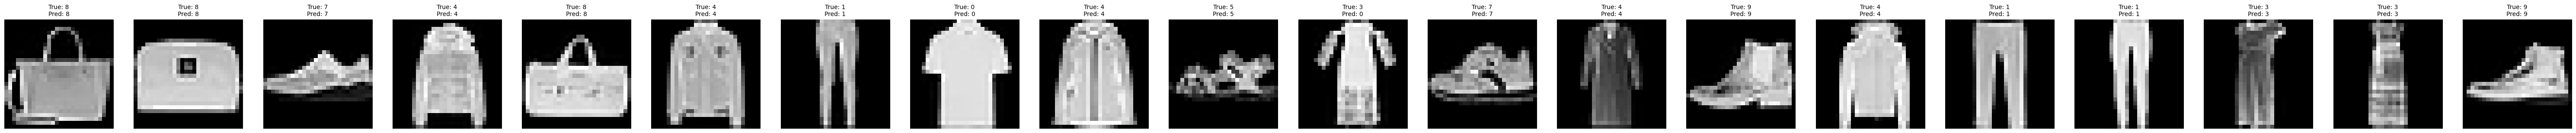

In [48]:
# Function to display images along with their actual and predicted labels
def plot_images_with_predictions(images, labels_true, labels_pred, num_images=5):
    num_rows = 1
    num_cols = num_images
    plt.figure(figsize=(3*num_cols, 3*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'True: {labels_true[i]}\nPred: {labels_pred[i]}', fontsize=10)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Predict labels for the validation set using PCA-NN model
predicted_labels_pca = np.argmax(pca_model.predict(val_images_pca), axis=-1)

# Display some samples along with their actual and predicted labels
plot_images_with_predictions(val_images, val_labels, predicted_labels_pca, num_images=20)


# Comparison with Assignment 2:

In assignment 2, we picked three classifiers:
1-Random Forest
2-Logistic Regression
3-Naive Bayes

we found that Random Forest classifier performed the best with an accuracy of 88%.
For PCA-NN our accuracy with 10 epochs is around 89%. While that may seem like a minute increase, we should keep in mind the significantly lower training time of the PCA-NN.
Comparing the results overall as well we can safely say that using a neural network with PCA tends to give better and more efficent results as compared to standard classifiers.

# Discussion & Conclusion:


*   Both models achieved similar accuracies on the test set.

*   The PCA-NN model exhibited shorter training time compared to the non-PCA NN model (39.03 seconds vs. 68.27 seconds).


*   Dimensionality reduction via PCA improved computational efficiency without significantly impacting accuracy.

*   Dimensionality reduction techniques like PCA offer practical solutions for improving the scalability and efficiency of machine learning models.



